In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os

import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
csv_path = 'drive/MyDrive/GOOGL.csv'
df = pd.read_csv(csv_path)

In [ ]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2021-01-04,88.000000,88.124496,85.357002,86.306503,86.306503,37324000
1,1,2021-01-05,86.254501,87.341499,85.845001,87.002502,87.002502,20360000
2,2,2021-01-06,85.013000,87.198502,84.805000,86.143997,86.143997,46588000
3,3,2021-01-07,86.337997,88.890999,86.337997,88.717003,88.717003,41936000
4,4,2021-01-08,88.858002,89.968002,88.060997,89.891502,89.891502,35484000


In [ ]:
df.index = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [ ]:
df = df.drop(df.columns[[0, 1]], axis=1)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,88.000000,88.124496,85.357002,86.306503,86.306503,37324000
2021-01-05,86.254501,87.341499,85.845001,87.002502,87.002502,20360000
2021-01-06,85.013000,87.198502,84.805000,86.143997,86.143997,46588000
2021-01-07,86.337997,88.890999,86.337997,88.717003,88.717003,41936000
2021-01-08,88.858002,89.968002,88.060997,89.891502,89.891502,35484000


In [ ]:
# normalize features
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled = scaler.fit_transform(df)
# scaled[0]

In [ ]:
#divide data into train and test
train_ind = int(df.shape[0] * 0.8)
# val_ind = train_ind + int(len(X1) * 0.2)

train_df = df[:train_ind].copy()
test_df = df[train_ind:].copy()

In [ ]:
# Training the scaler after splitting. Otherwise we will end up contaminating the result.
scalers = []
for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train_df[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers.append(scaler)
    train_df[i]=s_s
for idx, i in enumerate(train_df.columns):
    scaler = scalers[idx]
    s_s = scaler.transform(test_df[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    test_df[i]=s_s


In [ ]:
test_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-16,-0.049565,0.052802,0.009472,0.086608,0.086608,-0.377363
2023-05-17,0.044643,0.081098,0.084519,0.126663,0.126663,-0.583745
2023-05-18,0.085103,0.131539,0.143703,0.186595,0.186595,-0.550077
2023-05-19,0.163610,0.213352,0.183972,0.184487,0.184487,-0.442656
2023-05-22,0.145191,0.227500,0.201971,0.253454,0.253454,-0.549746


In [ ]:
def df_to_X_y(df, window_size = 10, out_size = 5):
  """ Window size is how many past entries to consider, out size is how many values to predict """
  df_as_np = df.to_numpy()
  close_col_idx = df.columns.get_loc('Close')
  X = [] # matrix
  y = [] # list
  for entryNo in range(len(df_as_np) - (out_size + window_size)):
    x_entry = df_as_np[entryNo : entryNo + window_size, :]
    X.append(x_entry)
    y.append(df_as_np[entryNo + window_size + 1 : entryNo + window_size + out_size + 1, close_col_idx])

  return np.array(X), np.array(y)

In [ ]:
# def df_to_X_y(df, window_size=5):
#   df_as_np = df.to_numpy()
#   close_col_idx = df.columns.get_loc('Close')
#   X = [] # matrix
#   y = [] # list
#   for entryNo in range(len(df_as_np) - window_size):
#     x_entry = [point for point in df_as_np[entryNo : entryNo + window_size]]
#     X.append(x_entry)
#     y.append(df_as_np[entryNo + window_size][close_col_idx])

#   return np.array(X), np.array(y)

In [ ]:
n_past = 10
n_future = 5
n_features = len(df.columns)


X_train1, y_train1 = df_to_X_y(train_df, n_past, n_future)
X_train1 = X_train1.reshape((X_train1.shape[0], X_train1.shape[1],n_features))
y_train1 = y_train1.reshape((y_train1.shape[0], y_train1.shape[1], 1))

X_test, y_test = df_to_X_y(test_df, n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], 1))


In [ ]:
# WINDOW_SIZE = 5

# X1, y1 = df_to_X_y(df, WINDOW_SIZE)
# X1.shape, y1.shape
X_train1.shape, y_train1.shape

((580, 10, 6), (580, 5, 1))

In [ ]:
# #divide data into train and test
# train_ind = int(len(X1)*0.7)
# val_ind = train_ind + int(len(X1) * 0.2)

# X_train1, y_train1 = X1[:train_ind], y1[:train_ind]
# X_val1, y_val1 = X1[train_ind:val_ind], y1[train_ind:val_ind]
# X_test1, y_test1 = X1[val_ind:], y1[val_ind:]
# X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [ ]:
## Model 1 is simple LSTM
# model1 = Sequential()
# model1.add(InputLayer((5, 6)))
# model1.add(Reshape((1, 30)))
# model1.add(LSTM(64))
# model1.add(Dense(8, 'relu'))
# model1.add(Dense(1, 'linear'))

# model1.summary()

In [ ]:
# cp1 = ModelCheckpoint('model1/', save_best_only=True)
# model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
# model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=15, callbacks=[cp1])

In [ ]:
# train_predictions = model1.predict(X_train1).flatten()
# train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
# train_results

In [ ]:
# import matplotlib.pyplot as plt
# plt.plot(train_results['Train Predictions'][50:100])
# plt.plot(train_results['Actuals'][50:100])

In [ ]:
# Model 2 is Seq2Seq LSTM

# E1D1
# n_features ==> no of features at each timestep in the data.
#
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)

encoder_states1 = encoder_outputs1[1:]

#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs1[0])

#
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_outputs1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1))(decoder_l1)

#
model_e1d1 = tf.keras.models.Model(encoder_inputs, decoder_outputs1)

#
model_e1d1.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 10, 6)]              0         []                            
                                                                                                  
 lstm_6 (LSTM)               [(None, 100),                42800     ['input_3[0][0]']             
                              (None, 100),                                                        
                              (None, 100)]                                                        
                                                                                                  
 repeat_vector_2 (RepeatVec  (None, 5, 100)               0         ['lstm_6[0][0]']              
 tor)                                                                                       

In [ ]:
# # Model 3 is Seq 2 Seq LSTM but with 2 encoder decoder blocks

# # E2D2
# # n_features ==> no of features at each timestep in the data.
# #

# encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
# encoder_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
# encoder_outputs1 = encoder_l1(encoder_inputs)
# encoder_states1 = encoder_outputs1[1:]
# encoder_l2 = tf.keras.layers.LSTM(100, return_state=True)
# encoder_outputs2 = encoder_l2(encoder_outputs1[0])
# encoder_states2 = encoder_outputs2[1:]
# #
# decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
# #
# decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
# decoder_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
# decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1))(decoder_l2)
# #
# model_e2d2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
# #
# model_e2d2.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 10, 6)]              0         []                            
                                                                                                  
 lstm_2 (LSTM)               [(None, 10, 100),            42800     ['input_2[0][0]']             
                              (None, 100),                                                        
                              (None, 100)]                                                        
                                                                                                  
 lstm_3 (LSTM)               [(None, 100),                80400     ['lstm_2[0][0]']              
                              (None, 100),                                                  

In [ ]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)
model_e1d1.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e1d1=model_e1d1.fit(X_train1, y_train1, epochs=25, validation_data=(X_test,y_test), batch_size=32, verbose=0, callbacks = [reduce_lr])
# model_e2d2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
# history_e2d2=model_e2d2.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=32,verbose=0,callbacks=[reduce_lr])


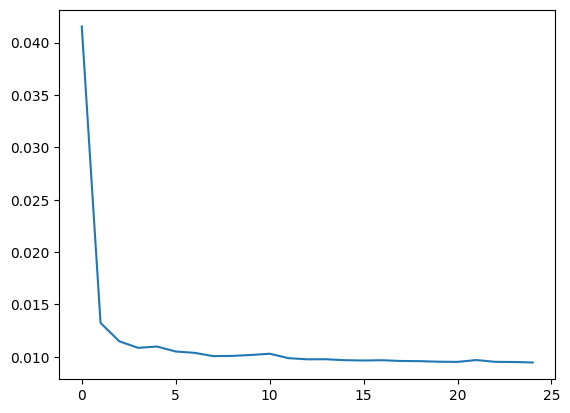

In [ ]:
from matplotlib import pyplot as plt
# plt.plot(history_e1d1.history['lr'])
plt.plot(history_e1d1.history['loss'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [ ]:
pred_e1d1=model_e1d1.predict(X_test)
# pred_e2d2=model_e2d2.predict(X_test)

5/5 [==============================] - 1s 8ms/step


In [ ]:
pred_e1d1[0]

array([[0.20982805, 0.21365048, 0.21184444, 0.20436116, 0.21444903],
       [0.22154191, 0.22393136, 0.22416358, 0.22078331, 0.22697154],
       [0.22916734, 0.22900255, 0.23237424, 0.22743116, 0.23230343],
       [0.23463129, 0.23198289, 0.23807861, 0.22963554, 0.23352505],
       [0.23888457, 0.23426804, 0.24219845, 0.23005056, 0.23257169]],
      dtype=float32)

In [ ]:
feature_scalar = scalers[3]
pred_e1d1[:,0]=feature_scalar.inverse_transform(pred_e1d1[:,0])
pred_e1d1[:,1]=feature_scalar.inverse_transform(pred_e1d1[:,1])
pred_e1d1[:,2]=feature_scalar.inverse_transform(pred_e1d1[:,2])
pred_e1d1[:,3]=feature_scalar.inverse_transform(pred_e1d1[:,3])
pred_e1d1[:,4]=feature_scalar.inverse_transform(pred_e1d1[:,4])

for index in range(y_test[0].shape[0]):
    # pred1_e1d1[:,:,index]=scaler.inverse_transform(pred1_e1d1[:,:,index])
    # pred1_e2d2[:,:,index]=scaler.inverse_transform(pred1_e2d2[:,:,index])
    # pred_e2d2[:,:,index]=scaler.inverse_transform(pred_e2d2[:,:,index])
    # y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,index]=feature_scalar.inverse_transform(y_test[:,index])


IndexError: ignored

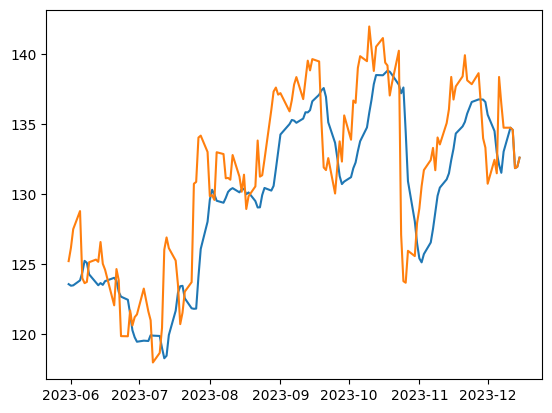

In [ ]:
import matplotlib.pyplot as plt

plot_points = y_test[:, 0]
plot_points = np.append(plot_points, y_test[-1,:], axis = 0)

plot_pred_points = pred_e1d1[:,0]
plot_pred_points = np.append(plot_pred_points, y_test[-1,:], axis = 0)

plt.plot(test_df.index[n_past:], plot_pred_points)
plt.plot(test_df.index[n_past:], plot_points)

In [ ]:
y_test[:, 0].shape

(134, 1)

In [ ]:
plot_points = y_test[:, 0]
plot_points = np.append(plot_points, y_test[-1,:], axis = 0)
plot_points.shape

(139, 1)

array([134.74422913])